# **Sample Data Analysis**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)  # None means no limit on rows

In [3]:
df = pd.read_csv("merged_output.csv")
df.drop(columns=['Unnamed: 0'], axis=0, inplace = True)
df.head()

,Unnamed: 0,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,3811797,2022-03-19,SkyWest Airlines Inc.,ASE,DEN,False,False,1831,1826.0,0.0,-5.0,1923.0,0.0,31.0,62.0,57.0,125.0,2022,1,3,19,6,UA,UA_CODESHARE,19977,UA,5745,OO,20304,OO,N794SK,5745,10372,1037205,30372,"Aspen, CO",CO,8,Colorado,82,11292,1129202,30325,"Denver, CO",CO,8,Colorado,82,0.0,-1.0,1800-1859,19.0,1845.0,1916.0,7.0,1933,-10.0,0.0,-1.0,1900-1959,1,0.0
1,615029,2022-02-16,SkyWest Airlines Inc.,TYS,DEN,False,False,1605,1605.0,0.0,0.0,1812.0,35.0,194.0,212.0,247.0,1162.0,2022,1,2,16,3,UA,UA_CODESHARE,19977,UA,5733,OO,20304,OO,N127SY,5733,15412,1541205,35412,"Knoxville, TN",TN,47,Tennessee,54,11292,1129202,30325,"Denver, CO",CO,8,Colorado,82,0.0,0.0,1600-1659,9.0,1614.0,1728.0,44.0,1737,35.0,1.0,2.0,1700-1759,5,0.0
2,3228533,2022-01-18,American Airlines Inc.,LAX,OGG,False,False,1719,1714.0,0.0,-5.0,2052.0,3.0,314.0,330.0,338.0,2486.0,2022,1,1,18,2,AA,AA,19805,AA,205,AA,19805,AA,N400AN,205,12892,1289208,32575,"Los Angeles, CA",CA,6,California,91,13830,1383002,33830,"Kahului, HI",HI,15,Hawaii,2,0.0,-1.0,1700-1759,14.0,1728.0,2042.0,10.0,2049,3.0,0.0,0.0,2000-2059,10,0.0
3,3129490,2022-01-23,Southwest Airlines Co.,LAS,BWI,False,False,1515,1533.0,18.0,18.0,2302.0,27.0,251.0,260.0,269.0,2106.0,2022,1,1,23,7,WN,WN,19393,WN,312,WN,19393,WN,N7828A,312,12889,1288903,32211,"Las Vegas, NV",NV,32,Nevada,85,10821,1082106,30852,"Baltimore, MD",MD,24,Maryland,35,1.0,1.0,1500-1559,15.0,1548.0,2259.0,3.0,2235,27.0,1.0,1.0,2200-2259,9,0.0
4,1273418,2022-07-01,Delta Air Lines Inc.,DTW,RDU,False,False,715,709.0,0.0,-6.0,837.0,0.0,73.0,98.0,88.0,501.0,2022,3,7,1,5,DL,DL,19790,DL,698,DL,19790,DL,N333NB,698,11433,1143302,31295,"Detroit, MI",MI,26,Michigan,43,14492,1449202,34492,"Raleigh/Durham, NC",NC,37,North Carolina,36,0.0,-1.0,0700-0759,12.0,721.0,834.0,3.0,853,-16.0,0.0,-2.0,0800-0859,3,0.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5516518 entries, 0 to 5516517
Data columns (total 61 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   FlightDate                               object 
 1   Airline                                  object 
 2   Origin                                   object 
 3   Dest                                     object 
 4   Cancelled                                bool   
 5   Diverted                                 bool   
 6   CRSDepTime                               int64  
 7   DepTime                                  float64
 8   DepDelayMinutes                          float64
 9   DepDelay                                 float64
 10  ArrTime                                  float64
 11  ArrDelayMinutes                          float64
 12  AirTime                                  float64
 13  CRSElapsedTime                           float64
 14  ActualElapsedTime 

In [16]:
df.columns

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOu

In [4]:
# Assuming df is your DataFrame
df['Departure_Delayed'] = (df['DepDelayMinutes'] > 0).astype(int)
df['Arrival_Delayed'] = (df['ArrDelayMinutes'] > 0).astype(int)
df['Severe_Departure_Delay'] = (df['DepDelayMinutes'] >= 15).astype(int)
df['Severe_Arrival_Delay'] = (df['ArrDelayMinutes'] >= 15).astype(int)
df['On_Time_Arrival'] = (df['ArrDelayMinutes'] <= 0).astype(int)
df['Total_Delay'] = df['DepDelayMinutes'] + df['ArrDelayMinutes']

def categorize_delay(delay):
    if delay <= 0:
        return "On-Time"
    elif 0 < delay < 15:
        return "Minor Delay"
    elif 15 <= delay < 60:
        return "Moderate Delay"
    else:
        return "Severe Delay"

df['Delay_Category'] = df['Total_Delay'].apply(categorize_delay)

df.head()


,Unnamed: 0,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings,Departure_Delayed,Arrival_Delayed,Severe_Departure_Delay,Severe_Arrival_Delay,On_Time_Arrival,Total_Delay,Delay_Category
0,3811797,2022-03-19,SkyWest Airlines Inc.,ASE,DEN,False,False,1831,1826.0,0.0,-5.0,1923.0,0.0,31.0,62.0,57.0,125.0,2022,1,3,19,6,UA,UA_CODESHARE,19977,UA,5745,OO,20304,OO,N794SK,5745,10372,1037205,30372,"Aspen, CO",CO,8,Colorado,82,11292,1129202,30325,"Denver, CO",CO,8,Colorado,82,0.0,-1.0,1800-1859,19.0,1845.0,1916.0,7.0,1933,-10.0,0.0,-1.0,1900-1959,1,0.0,0,0,0,0,1,0.0,On-Time
1,615029,2022-02-16,SkyWest Airlines Inc.,TYS,DEN,False,False,1605,1605.0,0.0,0.0,1812.0,35.0,194.0,212.0,247.0,1162.0,2022,1,2,16,3,UA,UA_CODESHARE,19977,UA,5733,OO,20304,OO,N127SY,5733,15412,1541205,35412,"Knoxville, TN",TN,47,Tennessee,54,11292,1129202,30325,"Denver, CO",CO,8,Colorado,82,0.0,0.0,1600-1659,9.0,1614.0,1728.0,44.0,1737,35.0,1.0,2.0,1700-1759,5,0.0,0,1,0,1,0,35.0,Moderate Delay
2,3228533,2022-01-18,American Airlines Inc.,LAX,OGG,False,False,1719,1714.0,0.0,-5.0,2052.0,3.0,314.0,330.0,338.0,2486.0,2022,1,1,18,2,AA,AA,19805,AA,205,AA,19805,AA,N400AN,205,12892,1289208,32575,"Los Angeles, CA",CA,6,California,91,13830,1383002,33830,"Kahului, HI",HI,15,Hawaii,2,0.0,-1.0,1700-1759,14.0,1728.0,2042.0,10.0,2049,3.0,0.0,0.0,2000-2059,10,0.0,0,1,0,0,0,3.0,Minor Delay
3,3129490,2022-01-23,Southwest Airlines Co.,LAS,BWI,False,False,1515,1533.0,18.0,18.0,2302.0,27.0,251.0,260.0,269.0,2106.0,2022,1,1,23,7,WN,WN,19393,WN,312,WN,19393,WN,N7828A,312,12889,1288903,32211,"Las Vegas, NV",NV,32,Nevada,85,10821,1082106,30852,"Baltimore, MD",MD,24,Maryland,35,1.0,1.0,1500-1559,15.0,1548.0,2259.0,3.0,2235,27.0,1.0,1.0,2200-2259,9,0.0,1,1,1,1,0,45.0,Moderate Delay
4,1273418,2022-07-01,Delta Air Lines Inc.,DTW,RDU,False,False,715,709.0,0.0,-6.0,837.0,0.0,73.0,98.0,88.0,501.0,2022,3,7,1,5,DL,DL,19790,DL,698,DL,19790,DL,N333NB,698,11433,1143302,31295,"Detroit, MI",MI,26,Michigan,43,14492,1449202,34492,"Raleigh/Durham, NC",NC,37,North Carolina,36,0.0,-1.0,0700-0759,12.0,721.0,834.0,3.0,853,-16.0,0.0,-2.0,0800-0859,3,0.0,0,0,0,0,1,0.0,On-Time


In [6]:
dfp = df[['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted', 'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay']]
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5516518 entries, 0 to 5516517
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   FlightDate       object 
 1   Airline          object 
 2   Origin           object 
 3   Dest             object 
 4   Cancelled        bool   
 5   Diverted         bool   
 6   CRSDepTime       int64  
 7   DepTime          float64
 8   DepDelayMinutes  float64
 9   DepDelay         float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 347.2+ MB


In [15]:
dfp.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay
0,2022-03-19,SkyWest Airlines Inc.,ASE,DEN,False,False,1831,1826.0,0.0,-5.0
1,2022-02-16,SkyWest Airlines Inc.,TYS,DEN,False,False,1605,1605.0,0.0,0.0
2,2022-01-18,American Airlines Inc.,LAX,OGG,False,False,1719,1714.0,0.0,-5.0
3,2022-01-23,Southwest Airlines Co.,LAS,BWI,False,False,1515,1533.0,18.0,18.0
4,2022-07-01,Delta Air Lines Inc.,DTW,RDU,False,False,715,709.0,0.0,-6.0


In [14]:
dfp.isna().sum()

FlightDate              0
Airline                 0
Origin                  0
Dest                    0
Cancelled               0
Diverted                0
CRSDepTime              0
DepTime            159318
DepDelayMinutes    159364
DepDelay           159364
dtype: int64

In [15]:
159318/550000*100

28.966909090909095

In [13]:
# General overview of data
dfp.info()  
dfp.describe()  

# Check for missing values
dfp.isnull().sum()

# Check unique values for categorical columns
print(dfp['Airline'].value_counts())
print('--------'*3)
print(dfp['Origin'].value_counts())
print(dfp['Dest'].value_counts())
print(dfp['Cancelled'].value_counts())
print(dfp['Diverted'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5516518 entries, 0 to 5516517
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   FlightDate       object 
 1   Airline          object 
 2   Origin           object 
 3   Dest             object 
 4   Cancelled        bool   
 5   Diverted         bool   
 6   CRSDepTime       int64  
 7   DepTime          float64
 8   DepDelayMinutes  float64
 9   DepDelay         float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 347.2+ MB
Airline
Southwest Airlines Co.                       970190
Delta Air Lines Inc.                         668869
American Airlines Inc.                       648154
SkyWest Airlines Inc.                        614718
United Air Lines Inc.                        417249
Republic Airlines                            255685
Envoy Air                                    219190
Endeavor Air Inc.                            204674
Comair Inc.                   

## **Univariate Analysis**

In [14]:
dfp['Airline'].unique()

array(['SkyWest Airlines Inc.', 'American Airlines Inc.',
       'Southwest Airlines Co.', 'Delta Air Lines Inc.',
       'Hawaiian Airlines Inc.', 'Spirit Air Lines', 'Comair Inc.',
       'United Air Lines Inc.', 'Alaska Airlines Inc.',
       'Endeavor Air Inc.', 'Mesa Airlines Inc.', 'Republic Airlines',
       'Horizon Air', 'GoJet Airlines, LLC d/b/a United Express',
       'Envoy Air', 'JetBlue Airways', 'Frontier Airlines Inc.',
       'Allegiant Air', 'Capital Cargo International',
       'Commutair Aka Champlain Enterprises, Inc.',
       'Air Wisconsin Airlines Corp', 'ExpressJet Airlines Inc.',
       'Trans States Airlines', 'Compass Airlines',
       'Empire Airlines Inc.', 'Peninsula Airways Inc.'], dtype=object)

C:\Users\RKC\AppData\Local\Temp\ipykernel_20260\3509361378.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Airline', data=dfp, palette='viridis', order=dfp['Airline'].value_counts().index)


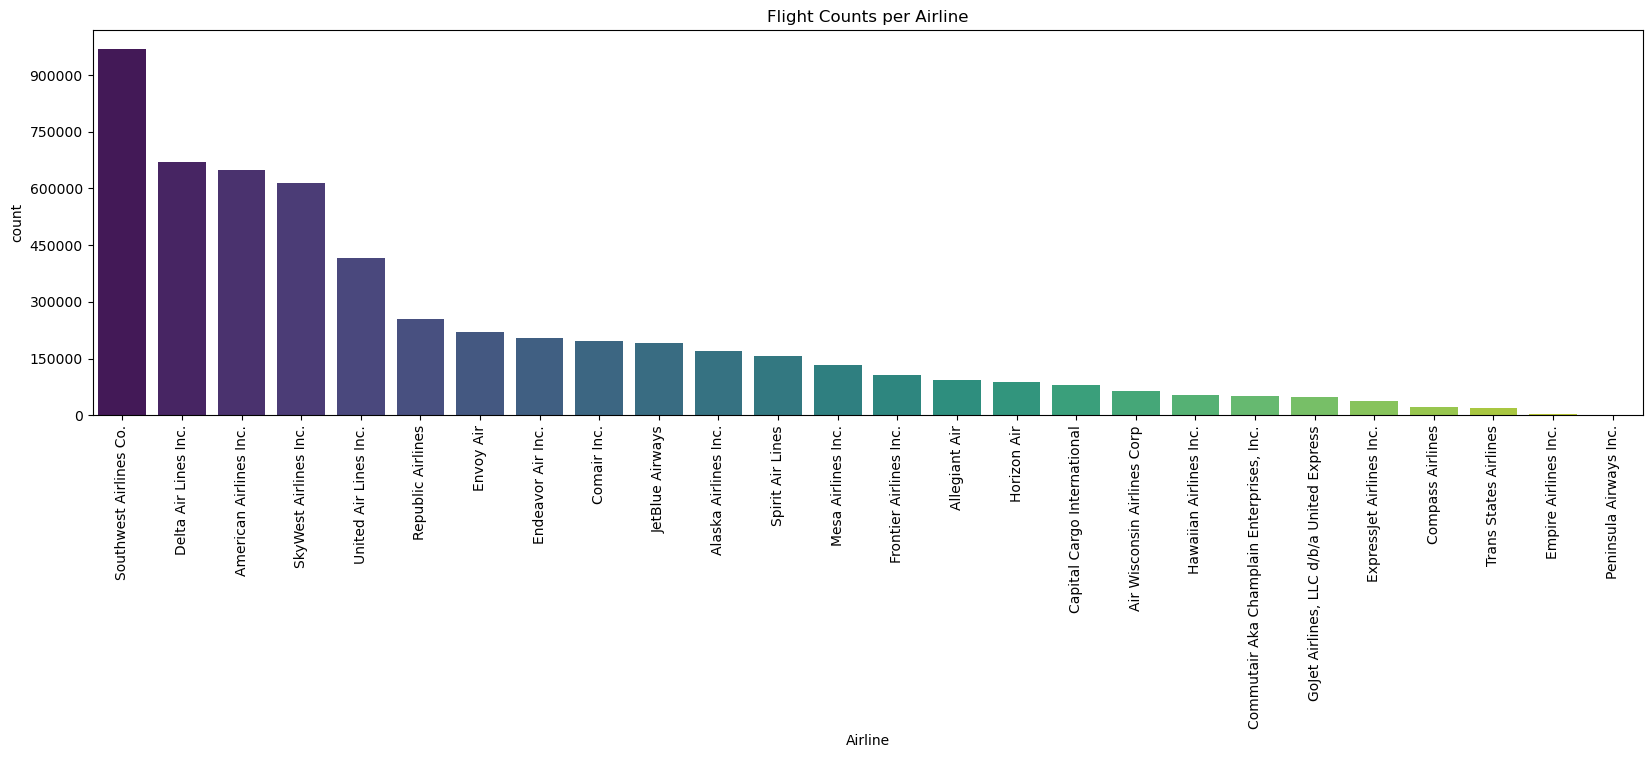

In [8]:
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(20, 5))
sns.countplot(x='Airline', data=dfp, palette='viridis', order=dfp['Airline'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Flight Counts per Airline')

# Set y-axis to show whole numbers
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

## **Bivariate Analysis**

C:\Users\RKC\AppData\Local\Temp\ipykernel_3288\927101397.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Airline", y="DepDelayMinutes", data=df, palette="viridis")


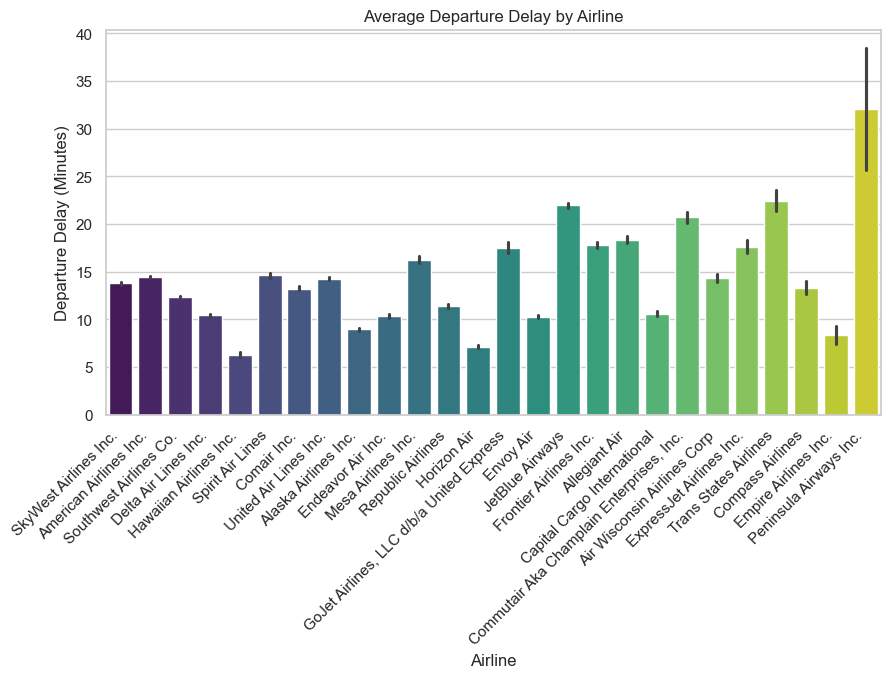

In [18]:
df["FlightDate"] = pd.to_datetime(df["FlightDate"])

sns.set(style="whitegrid")

# Plot 1: Bar Chart - Departure Delays per Airline
plt.figure(figsize=(10, 5))
sns.barplot(x="Airline", y="DepDelayMinutes", data=df, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Average Departure Delay by Airline")
plt.ylabel("Departure Delay (Minutes)")
plt.xlabel("Airline")
plt.show()


In [22]:
# Calculate average delay per airline
avg_delay_per_airline = dfp.groupby('Airline')['DepDelayMinutes'].mean()
print(avg_delay_per_airline.sort_values(ascending=False))

Airline
Peninsula Airways Inc.                       32.096491
Trans States Airlines                        22.460587
JetBlue Airways                              21.978884
Commutair Aka Champlain Enterprises, Inc.    20.728475
Allegiant Air                                18.341840
Frontier Airlines Inc.                       17.813358
ExpressJet Airlines Inc.                     17.594684
GoJet Airlines, LLC d/b/a United Express     17.514920
Mesa Airlines Inc.                           16.283276
Spirit Air Lines                             14.620655
American Airlines Inc.                       14.433425
Air Wisconsin Airlines Corp                  14.353068
United Air Lines Inc.                        14.249100
SkyWest Airlines Inc.                        13.776185
Compass Airlines                             13.324204
Comair Inc.                                  13.241280
Southwest Airlines Co.                       12.382967
Republic Airlines                            11.402839
Ca

In [23]:
# Calculate cancellation rate per airline
cancellation_rate = dfp.groupby('Airline')['Cancelled'].mean()
print(cancellation_rate.sort_values(ascending=False))

Airline
Peninsula Airways Inc.                       0.200000
Allegiant Air                                0.051876
ExpressJet Airlines Inc.                     0.051267
Trans States Airlines                        0.048712
GoJet Airlines, LLC d/b/a United Express     0.045373
Empire Airlines Inc.                         0.042304
Air Wisconsin Airlines Corp                  0.038935
Commutair Aka Champlain Enterprises, Inc.    0.038761
Mesa Airlines Inc.                           0.037895
Republic Airlines                            0.036471
Capital Cargo International                  0.035669
Southwest Airlines Co.                       0.035453
Comair Inc.                                  0.034392
Envoy Air                                    0.033259
American Airlines Inc.                       0.033193
JetBlue Airways                              0.031911
Frontier Airlines Inc.                       0.026745
Spirit Air Lines                             0.026054
Horizon Air         

In [27]:
airline_performance = pd.DataFrame({
    'avg_delay': avg_delay_per_airline,
    'cancellation_rate': cancellation_rate
})

airline_performance.sort_values(by='avg_delay' , ascending=False)

,avg_delay,cancellation_rate
Airline,,
Peninsula Airways Inc.,32.096491,0.200000
Trans States Airlines,22.460587,0.048712
JetBlue Airways,21.978884,0.031911
"Commutair Aka Champlain Enterprises, Inc.",20.728475,0.038761
Allegiant Air,18.341840,0.051876
Frontier Airlines Inc.,17.813358,0.026745
ExpressJet Airlines Inc.,17.594684,0.051267
"GoJet Airlines, LLC d/b/a United Express",17.514920,0.045373
Mesa Airlines Inc.,16.283276,0.037895


C:\Users\RKC\AppData\Local\Temp\ipykernel_20260\805815451.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airline_performance_sorted.index, y=airline_performance_sorted['avg_delay'], palette='viridis')


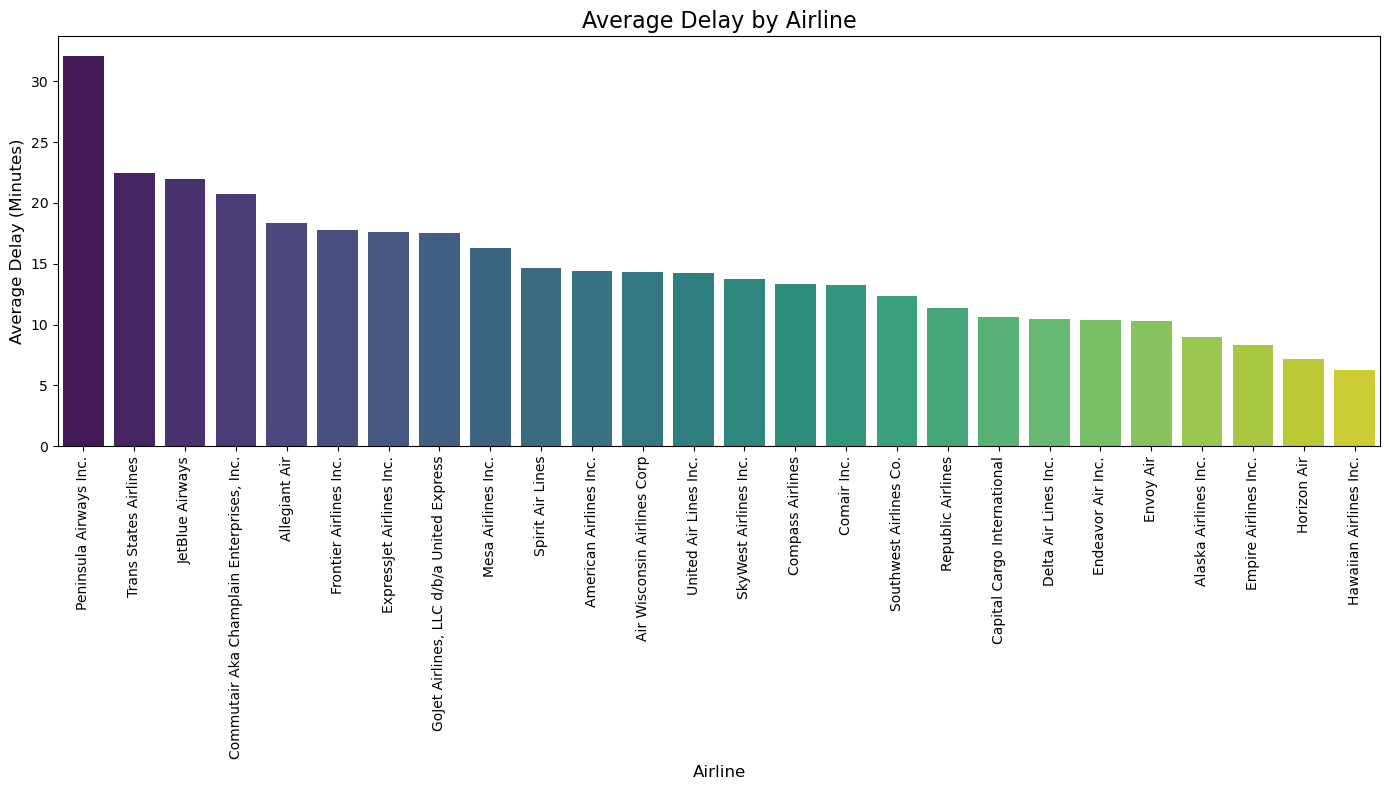

In [28]:
# Sort the DataFrame by 'avg_delay' in descending order
airline_performance_sorted = airline_performance.sort_values(by='avg_delay', ascending=False)

# Plot the average delay
plt.figure(figsize=(14, 8))
sns.barplot(x=airline_performance_sorted.index, y=airline_performance_sorted['avg_delay'], palette='viridis')

# Set plot labels and title
plt.title('Average Delay by Airline', fontsize=16)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Average Delay (Minutes)', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()

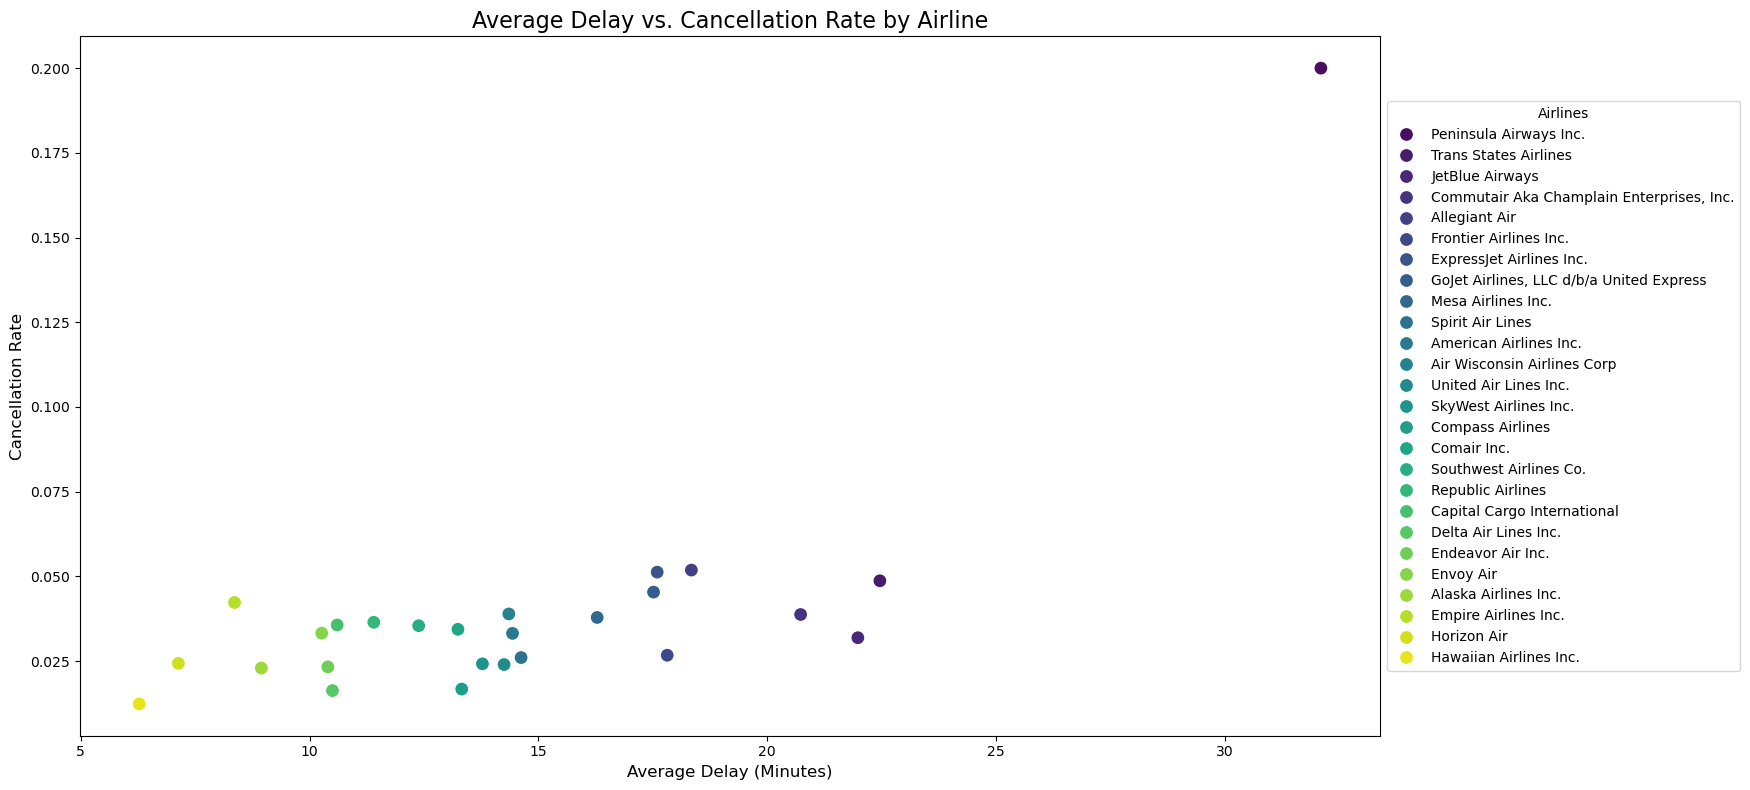

In [36]:
airline_performance_sorted = airline_performance.sort_values(by='avg_delay', ascending=False)

# Create a scatter plot
plt.figure(figsize=(14, 8))
sns.scatterplot(x='avg_delay', y='cancellation_rate', data=airline_performance_sorted, hue=airline_performance_sorted.index, palette='viridis', s=100)

# Set plot labels and title
plt.title('Average Delay vs. Cancellation Rate by Airline', fontsize=16)
plt.xlabel('Average Delay (Minutes)', fontsize=12)
plt.ylabel('Cancellation Rate', fontsize=12)
plt.tight_layout()
plt.legend(title='Airlines', bbox_to_anchor=(1.0, 0.5), loc='center left')

# Show the plot
plt.show()

## **Multivariate Analysis**

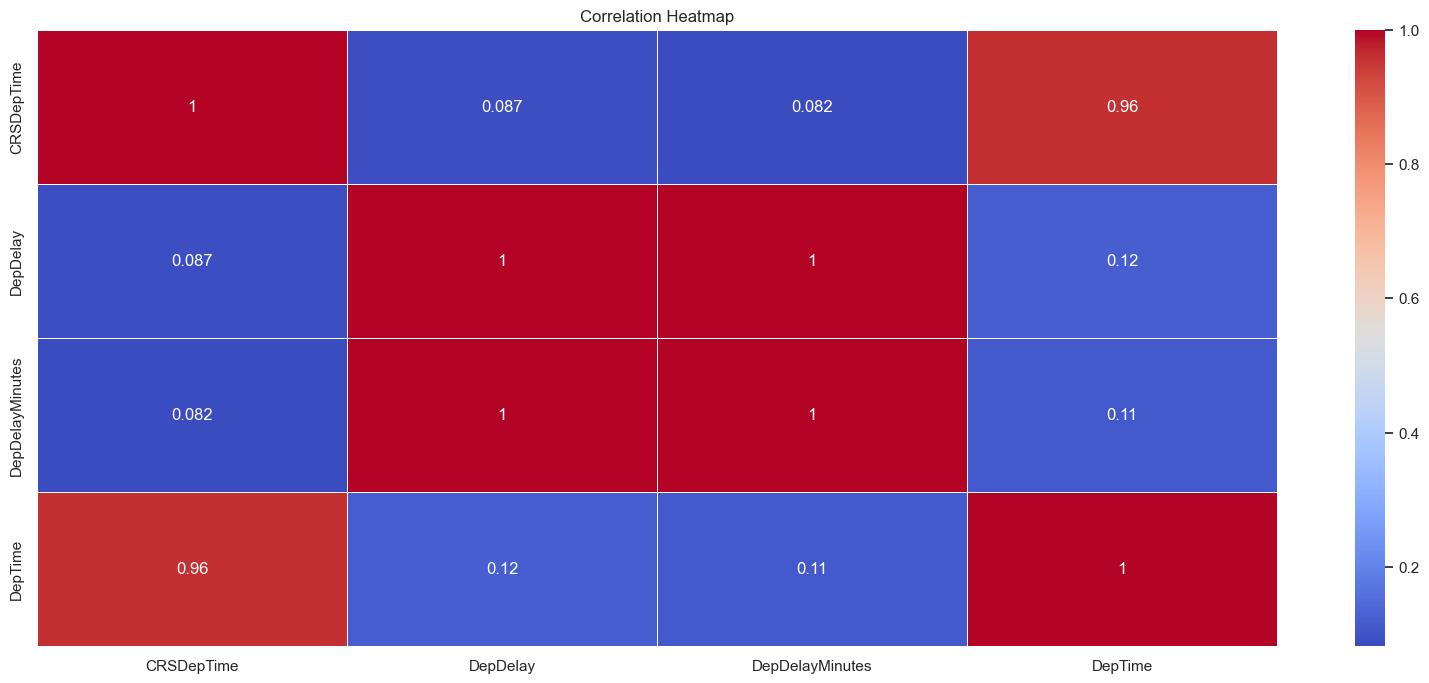

In [26]:
numeric_cols = dfp.select_dtypes(include=['number']).columns.difference(['FlightDate'])
plt.figure(figsize=(20, 8))
sns.heatmap(dfp[numeric_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()